# Import data and package stuff (☞ﾟヮﾟ)☞

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings, re, math
from datetime import datetime
from sklearn.preprocessing import LabelEncoder, StandardScaler

plt.style.use('dark_background')
warnings.filterwarnings('ignore')

In [2]:
ds = pd.read_csv('/kaggle/input/german-car-insights/gcar_data.csv')

y = ds.price_in_euro

ds = ds.drop(columns=['Unnamed: 0', 'price_in_euro', 'offer_description'], axis=1)

ds['price'] = y

ds

,brand,model,color,registration_date,year,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,price
0,ford,Ford Kuga,black,05/2023,2023,140,190,Automatic,Hybrid,"5,4 l/100 km",124 g/km,100.0,38490
1,hyundai,Hyundai i10,black,09/2018,2018,49,67,Manual,Petrol,"4,6 l/100 km",106 g/km,27782.0,11555
2,audi,Audi Q4 e-tron,grey,05/2021,2021,125,170,Automatic,Electric,NaN,0 g/km,4247.0,48886
3,honda,Honda CR-V,red,07/2018,2018,114,155,Automatic,Petrol,"7,5 l/100 km",175 g/km,57000.0,24490
4,kia,Kia Sportage,black,02/2023,2023,110,150,Manual,Petrol,"5,9 l/100 km",150 g/km,7500.0,34990
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,audi,Audi A1,blue,05/2012,2012,90,122,Manual,Petrol,"5,3 l/100 km",126 g/km,148000.0,12599
99996,fiat,Fiat 500,black,12/2019,2019,51,69,Automatic,Petrol,"5,2 l/100 km",120 g/km,31698.0,9999
99997,honda,Honda CR-V,brown,01/2019,2019,127,173,Manual,Petrol,"6,3 l/100 km",143 g/km,77900.0,24800
99998,alfa-romeo,Alfa Romeo Giulietta,grey,12/2020,2020,125,170,Automatic,Diesel,"5,5 l/100 km",145 g/km,52251.0,22990


# Feature Engineering 🎨

In [3]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   brand                     100000 non-null  object 
 1   model                     100000 non-null  object 
 2   color                     99924 non-null   object 
 3   registration_date         99999 non-null   object 
 4   year                      100000 non-null  object 
 5   power_kw                  99925 non-null   object 
 6   power_ps                  99928 non-null   object 
 7   transmission_type         100000 non-null  object 
 8   fuel_type                 100000 non-null  object 
 9   fuel_consumption_l_100km  88761 non-null   object 
 10  fuel_consumption_g_km     100000 non-null  object 
 11  mileage_in_km             99932 non-null   float64
 12  price                     100000 non-null  object 
dtypes: float64(1), object(12)
memory usage: 9.9+ 

In [4]:
ds.isna().sum()

brand                           0
model                           0
color                          76
registration_date               1
year                            0
power_kw                       75
power_ps                       72
transmission_type               0
fuel_type                       0
fuel_consumption_l_100km    11239
fuel_consumption_g_km           0
mileage_in_km                  68
price                           0
dtype: int64

In [5]:
ds.brand.value_counts()

brand
audi            21161
bmw             19810
ford            18790
hyundai          6989
kia              5734
fiat             5039
citroen          4083
dacia            3367
land-rover       3073
mazda            2190
jeep             1749
alfa-romeo       1437
jaguar           1398
honda             785
maserati          698
dodge             669
ferrari           590
bentley           541
lamborghini       361
aston-martin      277
isuzu             206
daihatsu          204
chevrolet         191
lada              191
cadillac          157
infiniti          112
lancia            105
daewoo             61
chrysler           32
Name: count, dtype: int64

##### Brands has alot of Unique values, which isn't suitable for label encoding, so i'm creating a ordinal value for each range bins, I chose the range randomly, no intentions on these ranges...

In [6]:
brand_count = ds.brand.value_counts()

def impute_brand(brandName):
    
    if brand_count[brandName] > 10000:
        return 2 # 'Top-Selling Car'
    elif brand_count[brandName] > 1000:
        return 1 # 'Good-Selling Car'
    else:
        return 0 # 'Normal-Selling Car'
        

ds.brand = ds.brand.apply(impute_brand)

ds

,brand,model,color,registration_date,year,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,price
0,2,Ford Kuga,black,05/2023,2023,140,190,Automatic,Hybrid,"5,4 l/100 km",124 g/km,100.0,38490
1,1,Hyundai i10,black,09/2018,2018,49,67,Manual,Petrol,"4,6 l/100 km",106 g/km,27782.0,11555
2,2,Audi Q4 e-tron,grey,05/2021,2021,125,170,Automatic,Electric,NaN,0 g/km,4247.0,48886
3,0,Honda CR-V,red,07/2018,2018,114,155,Automatic,Petrol,"7,5 l/100 km",175 g/km,57000.0,24490
4,1,Kia Sportage,black,02/2023,2023,110,150,Manual,Petrol,"5,9 l/100 km",150 g/km,7500.0,34990
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2,Audi A1,blue,05/2012,2012,90,122,Manual,Petrol,"5,3 l/100 km",126 g/km,148000.0,12599
99996,1,Fiat 500,black,12/2019,2019,51,69,Automatic,Petrol,"5,2 l/100 km",120 g/km,31698.0,9999
99997,0,Honda CR-V,brown,01/2019,2019,127,173,Manual,Petrol,"6,3 l/100 km",143 g/km,77900.0,24800
99998,1,Alfa Romeo Giulietta,grey,12/2020,2020,125,170,Automatic,Diesel,"5,5 l/100 km",145 g/km,52251.0,22990


In [7]:
ds.model.value_counts()[:60]

model
Ford Focus                       3875
Audi A3                          3567
Audi A4                          3397
Audi A6                          2880
Ford Fiesta                      2785
Ford Kuga                        2271
BMW 320                          2012
Audi A5                          1731
Fiat 500                         1621
Hyundai i30                      1616
Audi A1                          1353
Hyundai TUCSON                   1329
Kia Sportage                     1279
BMW X1                           1213
Audi Q3                          1199
Audi Q5                          1128
Ford Mondeo                      1112
BMW 530                          1108
Dacia Duster                     1107
Dacia Sandero                    1095
BMW 118                          1082
BMW 318                          1069
BMW 520                          1050
BMW X3                            969
Ford EcoSport                     863
Ford S-Max                        851
BMW 11

##### Models also has alot of Unique values, which isn't suitable for label encoding, so i'm creating a ordinal value for each range bins, I chose the range randomly, no intentions on these ranges...

In [8]:
model_count = ds.model.value_counts()

def impute_model(modelName):
    
    if model_count[modelName] > 2000:
        return 4 
    elif model_count[modelName] > 1000:
        return 3
    elif model_count[modelName] > 500:
        return 2
    elif model_count[modelName] > 100:
        return 1
    else:
        return 0
        

ds.model = ds.model.apply(impute_model)

ds

,brand,model,color,registration_date,year,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,price
0,2,4,black,05/2023,2023,140,190,Automatic,Hybrid,"5,4 l/100 km",124 g/km,100.0,38490
1,1,2,black,09/2018,2018,49,67,Manual,Petrol,"4,6 l/100 km",106 g/km,27782.0,11555
2,2,0,grey,05/2021,2021,125,170,Automatic,Electric,NaN,0 g/km,4247.0,48886
3,0,1,red,07/2018,2018,114,155,Automatic,Petrol,"7,5 l/100 km",175 g/km,57000.0,24490
4,1,3,black,02/2023,2023,110,150,Manual,Petrol,"5,9 l/100 km",150 g/km,7500.0,34990
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2,3,blue,05/2012,2012,90,122,Manual,Petrol,"5,3 l/100 km",126 g/km,148000.0,12599
99996,1,3,black,12/2019,2019,51,69,Automatic,Petrol,"5,2 l/100 km",120 g/km,31698.0,9999
99997,0,1,brown,01/2019,2019,127,173,Manual,Petrol,"6,3 l/100 km",143 g/km,77900.0,24800
99998,1,1,grey,12/2020,2020,125,170,Automatic,Diesel,"5,5 l/100 km",145 g/km,52251.0,22990


In [9]:
ds.fuel_type.value_counts()

fuel_type
Petrol           54290
Diesel           37593
Hybrid            4291
Electric          2467
LPG                930
Diesel Hybrid      137
Other               84
CNG                 61
Unknown             45
Hydrogen            39
Ethanol              9
Manual               6
Automatic            4
03/2017              2
12/2019              2
10/2022              2
04/2022              1
25890                1
12/2012              1
07/2022              1
07/2007              1
12/2016              1
08/2018              1
05/2015              1
145.500 km           1
11/2018              1
07/2004              1
144.919 km           1
06/2014              1
03/2014              1
02/2017              1
19450                1
08/2014              1
11/2021              1
20.600 km            1
180.000 km           1
160.629 km           1
04/2008              1
01/2016              1
12/2014              1
06/2004              1
108.313 km           1
74.194 km            1
0

##### On fuel_type, see alot of mismatched data, let's dig in more...

In [10]:
ids = []
for key in ds.fuel_type.value_counts().keys():
    ids.append(ds[ds.fuel_type == key].index[0])
    
ds.iloc[ids,:]

,brand,model,color,registration_date,year,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,price
1,1,2,black,09/2018,2018,49,67,Manual,Petrol,"4,6 l/100 km",106 g/km,27782.0,11555
6,1,0,white,01/2023,2023,130,177,Automatic,Diesel,"8,9 l/100 km",232 g/km,499.0,56390
0,2,4,black,05/2023,2023,140,190,Automatic,Hybrid,"5,4 l/100 km",124 g/km,100.0,38490
2,2,0,grey,05/2021,2021,125,170,Automatic,Electric,NaN,0 g/km,4247.0,48886
286,0,1,grey,03/2021,2021,295,401,Automatic,LPG,NaN,0 g/km,10900.0,56999
779,2,4,silver,05/2019,2019,210,286,Automatic,Diesel Hybrid,"5,9 l/100 km",155 g/km,148500.0,30500
1173,1,1,black,03/2020,2020,96,131,Manual,Other,"5,7 l/100 km",131 g/km,34865.0,24590
1446,2,3,red,08/2019,2019,125,170,Automatic,CNG,NaN,- (g/km),48000.0,25950
3292,0,0,red,02/2009,2009,338,460,Automatic,Unknown,NaN,- (g/km),34000.0,119890
4216,1,0,grey,04/2022,2022,120,163,Automatic,Hydrogen,"8,4 kg/100 km",0 g/km,999.0,64900


#### Mannn, what these on price columns 😶, let's impute that first

In [11]:
def impute_price(price):
    
    if re.match(r'^-?\d+\.?\d*$', price) is None:
        return np.nan

    return price

ds.price = ds.price.apply(impute_price)

ds.dropna(subset=['price'], inplace=True)

ds

,brand,model,color,registration_date,year,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,price
0,2,4,black,05/2023,2023,140,190,Automatic,Hybrid,"5,4 l/100 km",124 g/km,100.0,38490
1,1,2,black,09/2018,2018,49,67,Manual,Petrol,"4,6 l/100 km",106 g/km,27782.0,11555
2,2,0,grey,05/2021,2021,125,170,Automatic,Electric,NaN,0 g/km,4247.0,48886
3,0,1,red,07/2018,2018,114,155,Automatic,Petrol,"7,5 l/100 km",175 g/km,57000.0,24490
4,1,3,black,02/2023,2023,110,150,Manual,Petrol,"5,9 l/100 km",150 g/km,7500.0,34990
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2,3,blue,05/2012,2012,90,122,Manual,Petrol,"5,3 l/100 km",126 g/km,148000.0,12599
99996,1,3,black,12/2019,2019,51,69,Automatic,Petrol,"5,2 l/100 km",120 g/km,31698.0,9999
99997,0,1,brown,01/2019,2019,127,173,Manual,Petrol,"6,3 l/100 km",143 g/km,77900.0,24800
99998,1,1,grey,12/2020,2020,125,170,Automatic,Diesel,"5,5 l/100 km",145 g/km,52251.0,22990


#### Extracting the numerical values from fuel_consumption related columns

In [12]:
def impute_fuel_consptn(val):
    
    if val is np.nan:
        return val
       
    val = val.split(' ')
    
    if len(val) > 0:
        val = val[0].replace(',', '.')

        if re.match(r'^-?\d+\.?\d*$', val) is not None:
            return np.float32(val)
    
    return np.nan

ds.fuel_consumption_l_100km = ds.fuel_consumption_l_100km.apply(impute_fuel_consptn)
ds.fuel_consumption_g_km = ds.fuel_consumption_g_km.apply(impute_fuel_consptn)

ds

,brand,model,color,registration_date,year,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,price
0,2,4,black,05/2023,2023,140,190,Automatic,Hybrid,5.4,124.0,100.0,38490
1,1,2,black,09/2018,2018,49,67,Manual,Petrol,4.6,106.0,27782.0,11555
2,2,0,grey,05/2021,2021,125,170,Automatic,Electric,NaN,0.0,4247.0,48886
3,0,1,red,07/2018,2018,114,155,Automatic,Petrol,7.5,175.0,57000.0,24490
4,1,3,black,02/2023,2023,110,150,Manual,Petrol,5.9,150.0,7500.0,34990
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2,3,blue,05/2012,2012,90,122,Manual,Petrol,5.3,126.0,148000.0,12599
99996,1,3,black,12/2019,2019,51,69,Automatic,Petrol,5.2,120.0,31698.0,9999
99997,0,1,brown,01/2019,2019,127,173,Manual,Petrol,6.3,143.0,77900.0,24800
99998,1,1,grey,12/2020,2020,125,170,Automatic,Diesel,5.5,145.0,52251.0,22990


# Let's Fill the Missing Values 🔨

In [13]:
ds.isna().sum()

brand                           0
model                           0
color                          76
registration_date               0
year                            0
power_kw                       72
power_ps                       72
transmission_type               0
fuel_type                       0
fuel_consumption_l_100km    11652
fuel_consumption_g_km       16103
mileage_in_km                  47
price                           0
dtype: int64

In [14]:
ids = []
for key in ds.fuel_type.value_counts().keys():
    ids.append(ds[ds.fuel_type == key].index[0])
    
ds.iloc[ids,:]

,brand,model,color,registration_date,year,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,price
1,1,2,black,09/2018,2018,49,67,Manual,Petrol,4.6,106.0,27782.0,11555
6,1,0,white,01/2023,2023,130,177,Automatic,Diesel,8.9,232.0,499.0,56390
0,2,4,black,05/2023,2023,140,190,Automatic,Hybrid,5.4,124.0,100.0,38490
2,2,0,grey,05/2021,2021,125,170,Automatic,Electric,NaN,0.0,4247.0,48886
286,0,1,grey,03/2021,2021,295,401,Automatic,LPG,NaN,0.0,10900.0,56999
779,2,4,silver,05/2019,2019,210,286,Automatic,Diesel Hybrid,5.9,155.0,148500.0,30500
1173,1,1,black,03/2020,2020,96,131,Manual,Other,5.7,131.0,34865.0,24590
1446,2,3,red,08/2019,2019,125,170,Automatic,CNG,NaN,NaN,48000.0,25950
3292,0,0,red,02/2009,2009,338,460,Automatic,Unknown,NaN,NaN,34000.0,119890
4216,1,0,grey,04/2022,2022,120,163,Automatic,Hydrogen,8.4,0.0,999.0,64900


##### I'm going to fill the mean for missing values of fuel_consumption columns, I took the aggregations to impute faster... 🏃‍♂️🏃‍♂️🏃‍♂️

In [15]:
fuel_mean_agg = ds.groupby('fuel_type').agg({ 'fuel_consumption_l_100km': ['mean'], 'fuel_consumption_g_km': ['mean'] })

fuel_mean_agg.iloc[-1,0] = fuel_mean_agg[:-1].median()[0]
fuel_mean_agg.iloc[-1,1] = fuel_mean_agg[:-1].median()[1]

fuel_mean_agg

,fuel_consumption_l_100km,fuel_consumption_g_km
,mean,mean
fuel_type,,
CNG,5.829167,132.187805
Diesel,5.655540,145.460957
Diesel Hybrid,5.518699,140.523077
Electric,321.455000,187.872055
Ethanol,7.400000,199.800000
Hybrid,4.429916,78.170498
Hydrogen,1.800000,0.100000
LPG,7.848939,162.553306


In [16]:
%%time 

def impute_nan_fuel_cosptn(row):
    
    if math.isnan(row['fuel_consumption_l_100km']):
        row['fuel_consumption_l_100km'] = fuel_mean_agg.loc[row['fuel_type'], 'fuel_consumption_l_100km'][0]
    if math.isnan(row['fuel_consumption_g_km']):
        row['fuel_consumption_g_km'] = fuel_mean_agg.loc[row['fuel_type'], 'fuel_consumption_g_km'][0]
    
    return row
    
ds = ds.apply(impute_nan_fuel_cosptn, axis=1)

ds

CPU times: user 21.9 s, sys: 297 ms, total: 22.2 s
Wall time: 22.2 s


,brand,model,color,registration_date,year,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,price
0,2,4,black,05/2023,2023,140,190,Automatic,Hybrid,5.400,124.0,100.0,38490
1,1,2,black,09/2018,2018,49,67,Manual,Petrol,4.600,106.0,27782.0,11555
2,2,0,grey,05/2021,2021,125,170,Automatic,Electric,321.455,0.0,4247.0,48886
3,0,1,red,07/2018,2018,114,155,Automatic,Petrol,7.500,175.0,57000.0,24490
4,1,3,black,02/2023,2023,110,150,Manual,Petrol,5.900,150.0,7500.0,34990
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2,3,blue,05/2012,2012,90,122,Manual,Petrol,5.300,126.0,148000.0,12599
99996,1,3,black,12/2019,2019,51,69,Automatic,Petrol,5.200,120.0,31698.0,9999
99997,0,1,brown,01/2019,2019,127,173,Manual,Petrol,6.300,143.0,77900.0,24800
99998,1,1,grey,12/2020,2020,125,170,Automatic,Diesel,5.500,145.0,52251.0,22990


In [17]:
ds.isna().sum()

brand                        0
model                        0
color                       76
registration_date            0
year                         0
power_kw                    72
power_ps                    72
transmission_type            0
fuel_type                    0
fuel_consumption_l_100km     0
fuel_consumption_g_km        0
mileage_in_km               47
price                        0
dtype: int64

In [18]:
ds.power_kw = ds.power_kw.astype('float64')

ds.power_ps = ds.power_ps.astype('float64')

ds.power_kw = ds.power_kw.fillna(ds.power_kw.mean())

ds.power_ps = ds.power_ps.fillna(ds.power_ps.mean())

ds.mileage_in_km = ds.mileage_in_km.fillna(ds.mileage_in_km.mean())

ds.color = ds.color.fillna(ds.color.value_counts().keys()[0])

ds

,brand,model,color,registration_date,year,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,price
0,2,4,black,05/2023,2023,140.0,190.0,Automatic,Hybrid,5.400,124.0,100.0,38490
1,1,2,black,09/2018,2018,49.0,67.0,Manual,Petrol,4.600,106.0,27782.0,11555
2,2,0,grey,05/2021,2021,125.0,170.0,Automatic,Electric,321.455,0.0,4247.0,48886
3,0,1,red,07/2018,2018,114.0,155.0,Automatic,Petrol,7.500,175.0,57000.0,24490
4,1,3,black,02/2023,2023,110.0,150.0,Manual,Petrol,5.900,150.0,7500.0,34990
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2,3,blue,05/2012,2012,90.0,122.0,Manual,Petrol,5.300,126.0,148000.0,12599
99996,1,3,black,12/2019,2019,51.0,69.0,Automatic,Petrol,5.200,120.0,31698.0,9999
99997,0,1,brown,01/2019,2019,127.0,173.0,Manual,Petrol,6.300,143.0,77900.0,24800
99998,1,1,grey,12/2020,2020,125.0,170.0,Automatic,Diesel,5.500,145.0,52251.0,22990


In [19]:
ds.isna().sum()

brand                       0
model                       0
color                       0
registration_date           0
year                        0
power_kw                    0
power_ps                    0
transmission_type           0
fuel_type                   0
fuel_consumption_l_100km    0
fuel_consumption_g_km       0
mileage_in_km               0
price                       0
dtype: int64

# Create new Features 🔬

In [20]:
ds['vehicle_age_in_years'] = ds.year.apply(lambda yr: 2024 - int(yr))

In [21]:
%%time

def calc_reg_delay(row):

    date0 = datetime.strptime(f"04/2024", '%m/%Y') # current date
    date1 = datetime.strptime(row['registration_date'], '%m/%Y')
    date2 = datetime.strptime(f"01/{row['year']}", '%m/%Y')
    
    
    row['registration_delay_in_months'] = (date1.year - date2.year) * 12 + (date1.month - date2.month)
    row['vehicle_age_in_months'] = (date0.year - date1.year) * 12 + (date0.month - date1.month)
    
    return row

ds['registration_delay_in_months'] = ds['year']
ds['vehicle_age_in_months'] = ds['year']

ds = ds.apply(calc_reg_delay, axis=1)

y = ds['price']

ds.drop(columns=['price', 'registration_date', 'year'], axis = 1, inplace=True)

ds['price'] = y

ds

CPU times: user 17.2 s, sys: 76.2 ms, total: 17.3 s
Wall time: 17.3 s


,brand,model,color,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,vehicle_age_in_years,registration_delay_in_months,vehicle_age_in_months,price
0,2,4,black,140.0,190.0,Automatic,Hybrid,5.400,124.0,100.0,1,4,11,38490
1,1,2,black,49.0,67.0,Manual,Petrol,4.600,106.0,27782.0,6,8,67,11555
2,2,0,grey,125.0,170.0,Automatic,Electric,321.455,0.0,4247.0,3,4,35,48886
3,0,1,red,114.0,155.0,Automatic,Petrol,7.500,175.0,57000.0,6,6,69,24490
4,1,3,black,110.0,150.0,Manual,Petrol,5.900,150.0,7500.0,1,1,14,34990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2,3,blue,90.0,122.0,Manual,Petrol,5.300,126.0,148000.0,12,4,143,12599
99996,1,3,black,51.0,69.0,Automatic,Petrol,5.200,120.0,31698.0,5,11,52,9999
99997,0,1,brown,127.0,173.0,Manual,Petrol,6.300,143.0,77900.0,5,0,63,24800
99998,1,1,grey,125.0,170.0,Automatic,Diesel,5.500,145.0,52251.0,4,11,40,22990


### Label Encoding for categorical data

In [22]:
for col in ds.select_dtypes(object).columns:
    ds[col] = LabelEncoder().fit_transform(ds[col])
    
ds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99946 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   brand                         99946 non-null  int64  
 1   model                         99946 non-null  int64  
 2   color                         99946 non-null  int64  
 3   power_kw                      99946 non-null  float64
 4   power_ps                      99946 non-null  float64
 5   transmission_type             99946 non-null  int64  
 6   fuel_type                     99946 non-null  int64  
 7   fuel_consumption_l_100km      99946 non-null  float64
 8   fuel_consumption_g_km         99946 non-null  float64
 9   mileage_in_km                 99946 non-null  float64
 10  vehicle_age_in_years          99946 non-null  int64  
 11  registration_delay_in_months  99946 non-null  int64  
 12  vehicle_age_in_months         99946 non-null  int64  
 13  price 

# Transform the features 🧪

In [23]:
col = ["power_kw", "power_ps", 'fuel_consumption_l_100km', 'fuel_consumption_g_km', 'mileage_in_km', 'vehicle_age_in_years', 'registration_delay_in_months', 'vehicle_age_in_months']

ds.power_kw = ds.power_kw.clip(.01, 500)
ds.power_ps = ds.power_ps.clip(.01, 600)

ds.mileage_in_km = np.log1p(ds.mileage_in_km)
ds.power_kw = np.log1p(ds.power_kw)
ds.power_ps = np.log1p(ds.power_ps)
ds.registration_delay_in_months = np.log1p(ds.registration_delay_in_months)

ds.fuel_consumption_l_100km = np.log(ds.fuel_consumption_l_100km)
ds.vehicle_age_in_years = np.log(ds.vehicle_age_in_years)
ds.vehicle_age_in_months = np.log(ds.vehicle_age_in_months)

ds.fuel_consumption_g_km = ds.fuel_consumption_g_km.clip(.01, 250)
ds.fuel_consumption_l_100km = ds.fuel_consumption_l_100km.clip(.01, 3)

# EDA 🔎

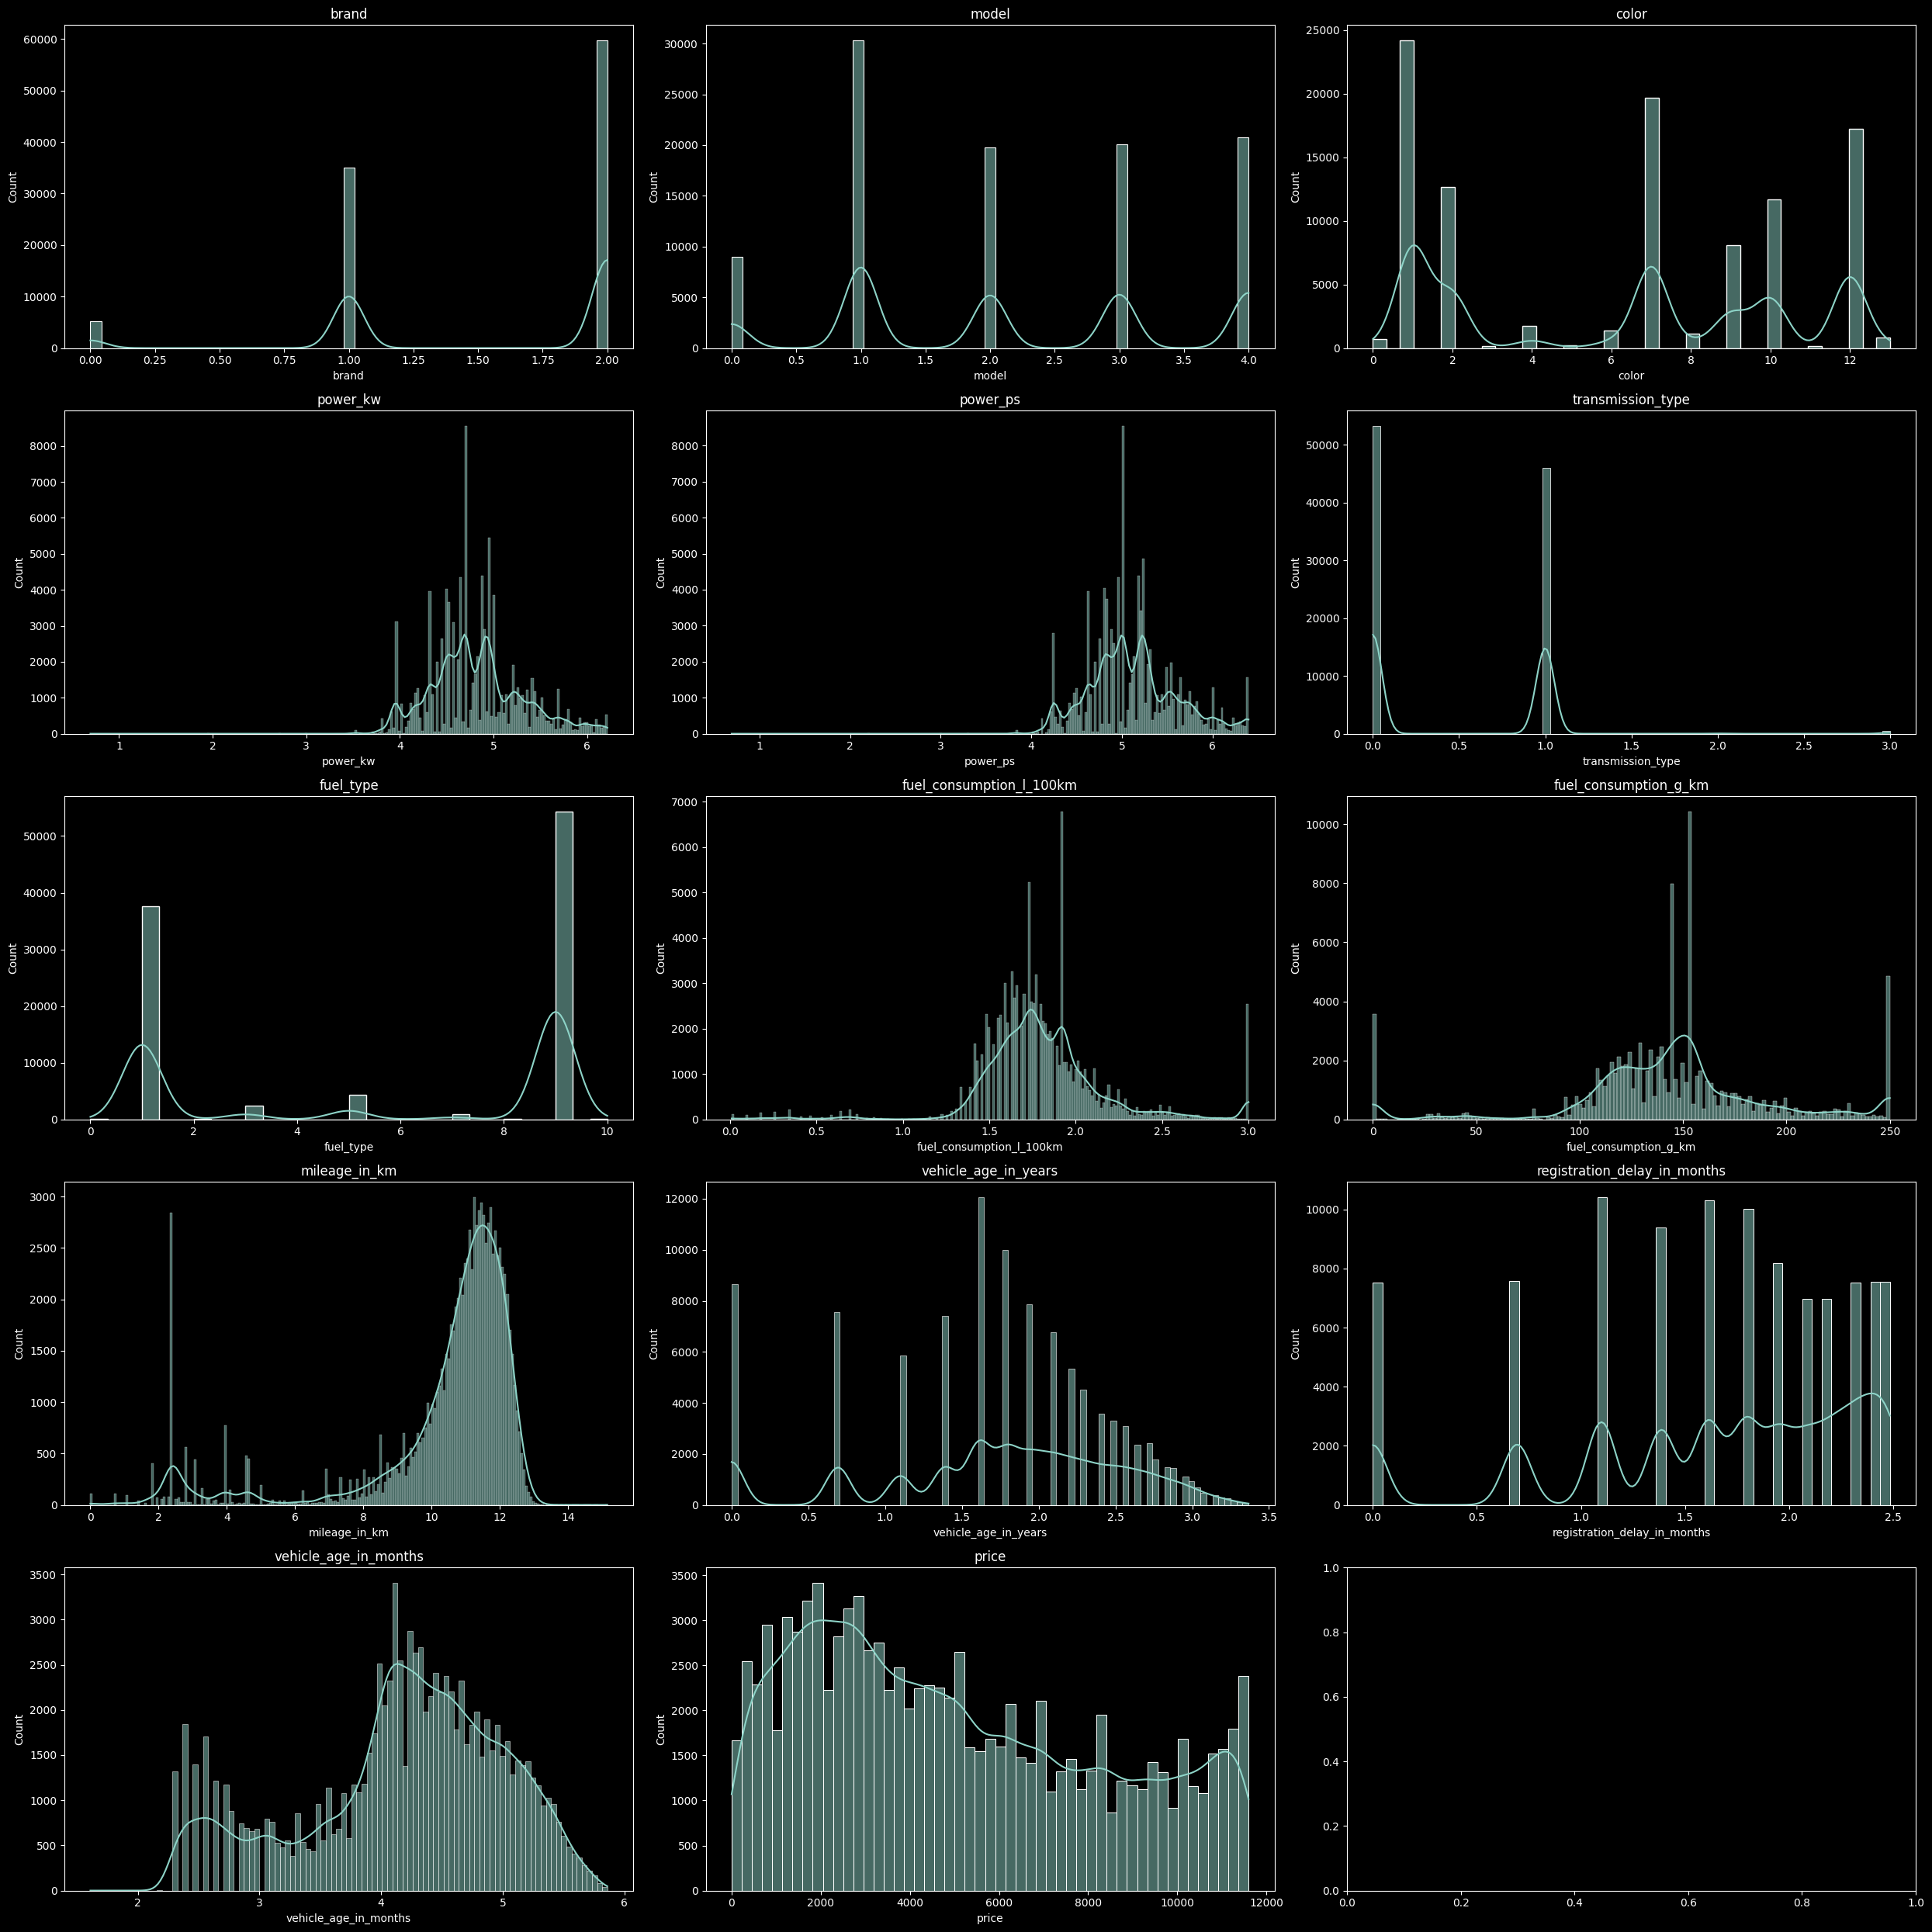

CPU times: user 15.7 s, sys: 3.84 s, total: 19.5 s
Wall time: 13.7 s


In [24]:
%%time

fig, ax = plt.subplots(5, 3, figsize=(25, 25))

for col, ax in zip(ds.columns, ax.flatten()):
    sns.histplot(ds[col], ax=ax, kde=True)
    ax.set_title(col)
    
plt.tight_layout()
plt.show()

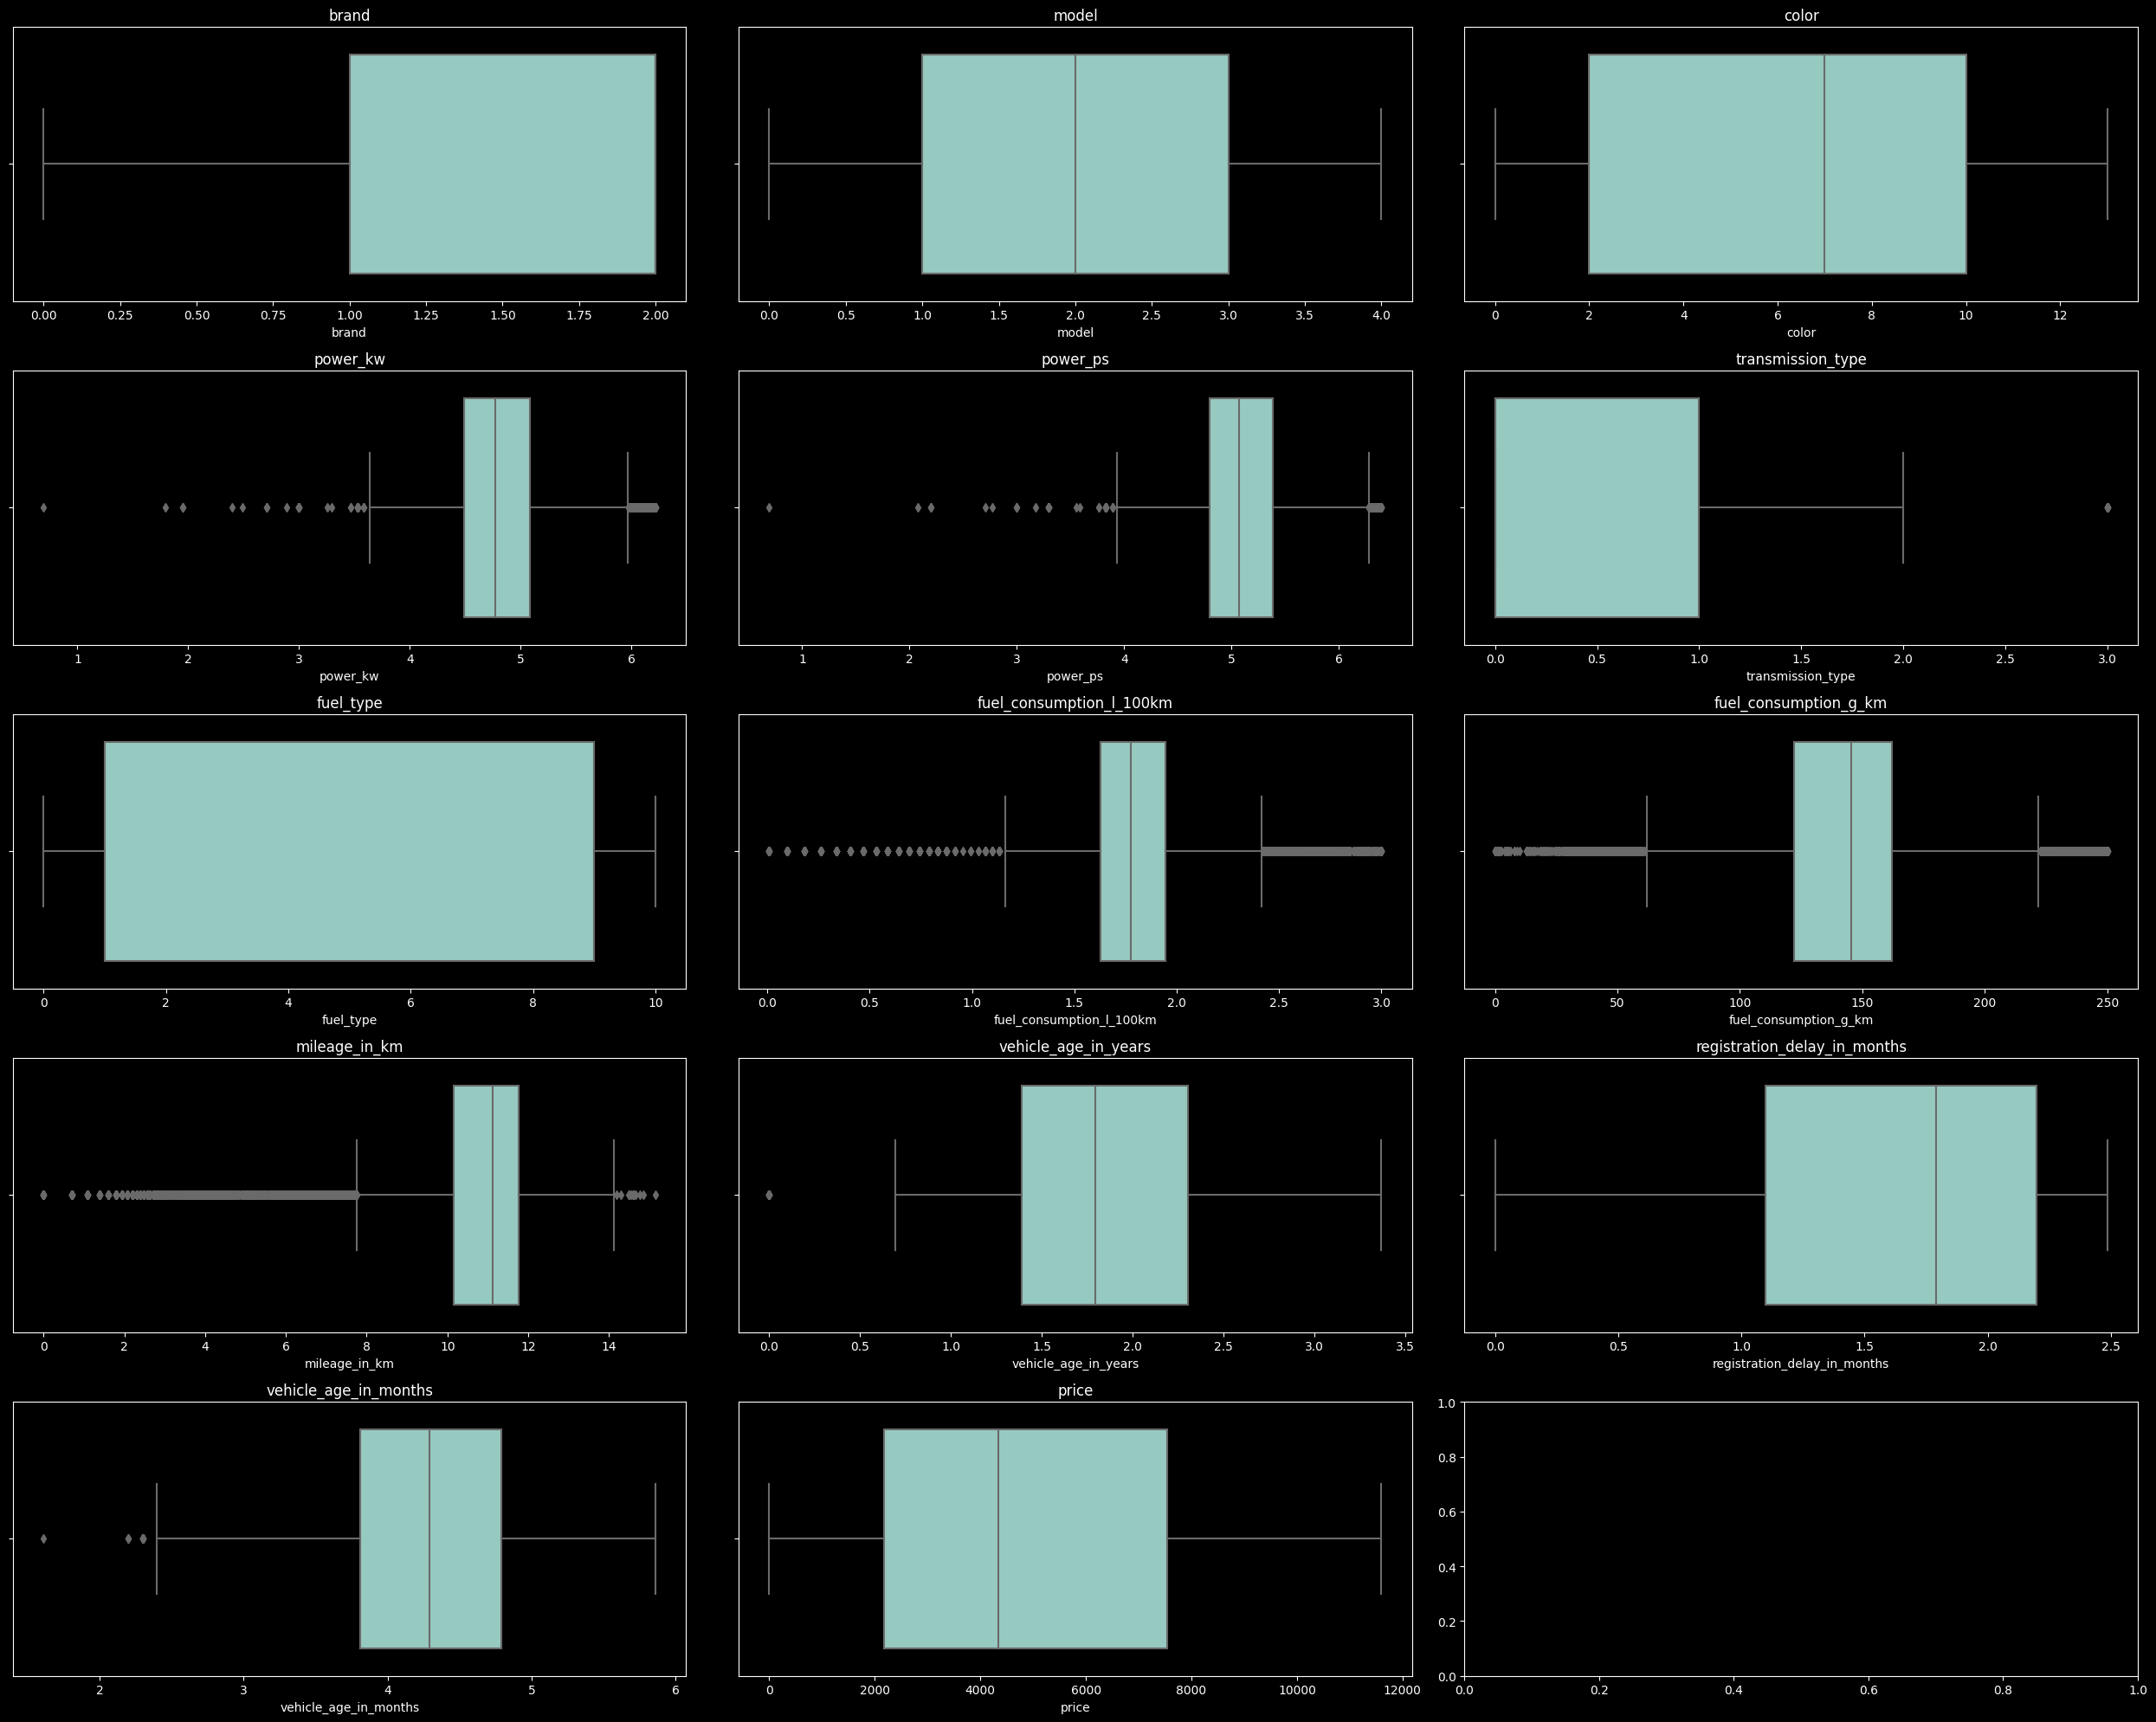

CPU times: user 2.78 s, sys: 268 ms, total: 3.05 s
Wall time: 2.67 s


In [25]:
%%time

fig, ax = plt.subplots(5, 3, figsize=(25, 20))

for col, ax in zip(ds.columns, ax.flatten()):
    sns.boxplot(x=ds[col], ax=ax)
    ax.set_title(col)
    
plt.tight_layout()
plt.show()

<Axes: >

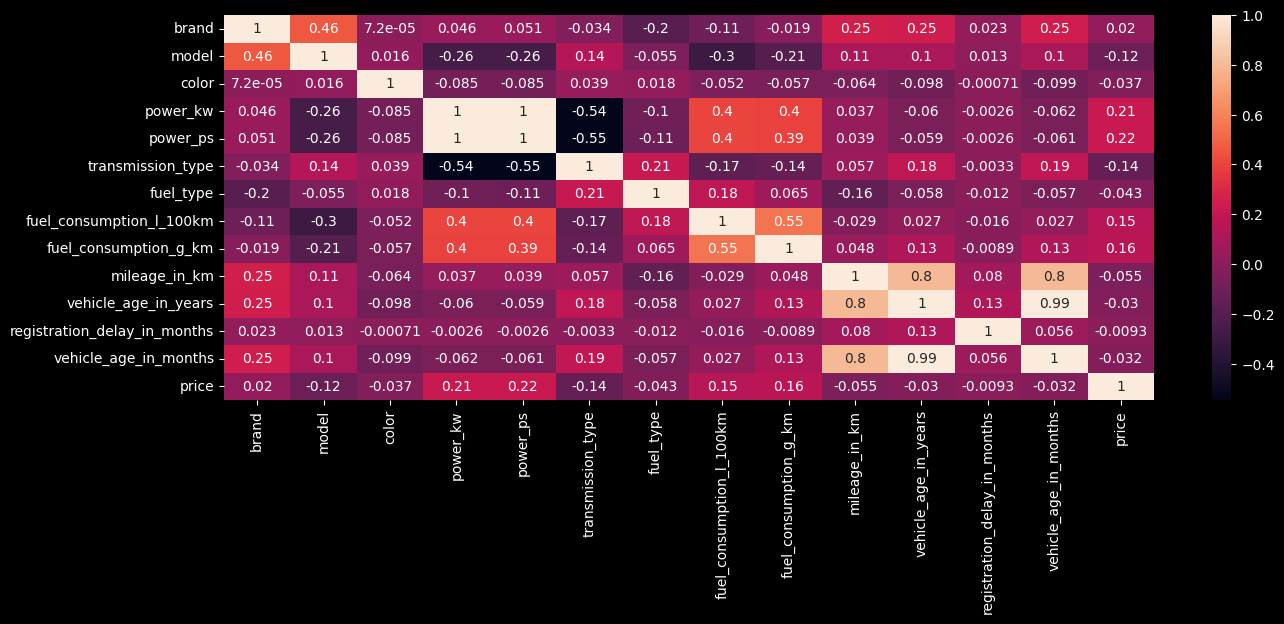

In [26]:
plt.subplots(figsize=(15, 5))

sns.heatmap(ds.corr(), annot=True)

### There is not much co-correlation btw features 😌

# Split the cakes equal 🍰

In [27]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(ds.iloc[:, :-1], ds.iloc[:, -1], train_size=.95, random_state=3)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((94948, 13), (94948,), (4998, 13), (4998,))

# Scale the data 📈

In [28]:
x_train = StandardScaler().fit_transform(x_train)
x_test = StandardScaler().fit_transform(x_test)

# The Black Magic on data 🧿

In [29]:
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRFRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor

from sklearn.metrics import mean_squared_log_error, mean_absolute_error, mean_squared_error, r2_score

models = {
    'catBoost': CatBoostRegressor(verbose = 0),
    'lgbm': LGBMRegressor(verbose=-1),
    'xgb': XGBRFRegressor(),
    'lr': LinearRegression(),
    'DTree': DecisionTreeRegressor(),
    'adaBoost': AdaBoostRegressor(),
    'randomForest': RandomForestRegressor(),
    'gBoost': GradientBoostingRegressor()
}

for label, model in models.items():
    
    model.fit(x_train, y_train)
    
    y_pred = model.predict(x_test)

    r2 = r2_score(y_test, y_pred)

    print(label, "R-squared score:", np.round(r2 * 100, 2), "%")
    
    print ('\n')

catBoost R-squared score: 53.22 %


lgbm R-squared score: 50.37 %


xgb R-squared score: 38.22 %


lr R-squared score: 8.67 %


DTree R-squared score: 5.01 %


adaBoost R-squared score: 21.74 %


randomForest R-squared score: 54.27 %


gBoost R-squared score: 40.26 %




### 🌳🌳🌳 Random Forest Does the best, so picking that for modeling...

In [30]:
%%time

model = RandomForestRegressor(n_estimators=250)

model.fit(x_train, y_train)
 
y_pred = model.predict(x_test)

r2 = r2_score(y_test, y_pred)

print("R-squared score:", np.round(r2 * 100, 2), "%")

R-squared score: 54.67 %
CPU times: user 2min 32s, sys: 1.43 s, total: 2min 33s
Wall time: 2min 33s


In [31]:
pd.DataFrame({
        'feature': ds.columns[:-1],
        'importance': model.feature_importances_,
    }).sort_values('importance', ascending=False)

,feature,importance
12,vehicle_age_in_months,0.271160
9,mileage_in_km,0.177656
4,power_ps,0.122488
3,power_kw,0.117725
7,fuel_consumption_l_100km,0.063307
8,fuel_consumption_g_km,0.061314
11,registration_delay_in_months,0.042532
2,color,0.035174
1,model,0.034141
0,brand,0.020603


# Oversee the model performance 👀

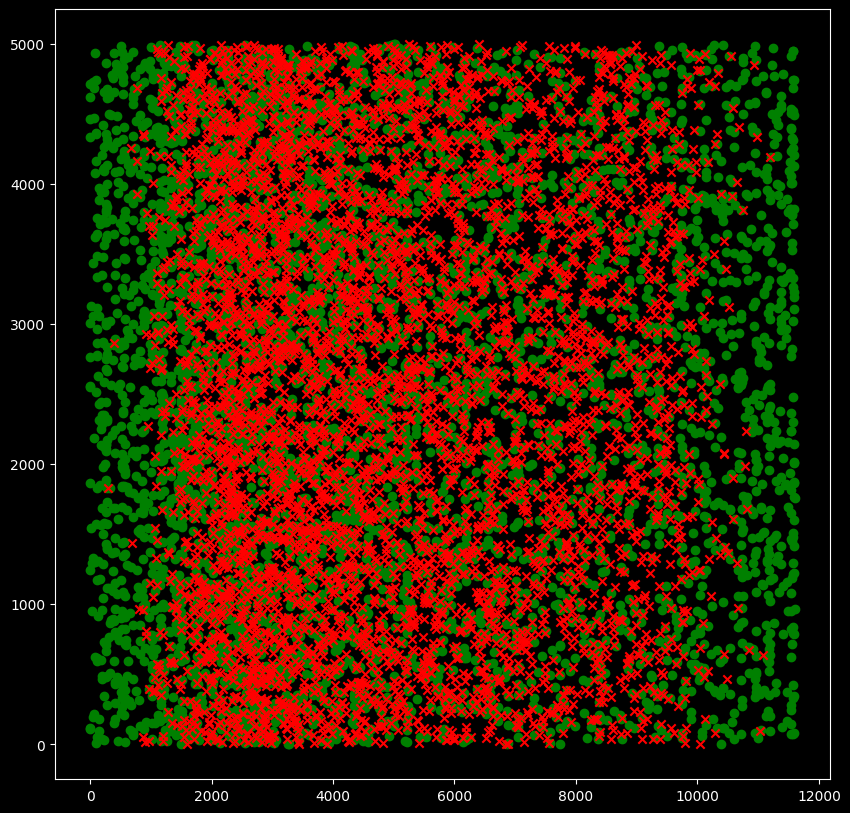

In [32]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.scatter(x = y_test, y = list(range(len(x_test))), color='green', marker='o')
ax.scatter(x = y_pred, y = list(range(len(x_test))), color='red', marker='x')

![thanksagain](https://i.imgflip.com/8nggab.jpg)

#  Any suggestion to improve performance are welcomed,  ✌